# Sentimental Analysis : MINOR PROJECT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string  


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading Data

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/marrrcin.csv",encoding='latin-1')
df2 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/Joseph-Ndungi.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/utquarsh027/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/d1.csv",encoding='latin-1')
df4 = pd.read_csv("https://raw.githubusercontent.com/utquarsh027/Twitter-Sentiment-Analysis-informal/main/Anamika/data/data/prateekjoshi565.csv")
# !pip install opendatasets
import opendatasets as od
dataset_url ='https://www.kaggle.com/datasets/kazanova/sentiment140'
od.download(dataset_url)
import os
data_dir='./sentiment140'
os.listdir(data_dir)
train_csv=data_dir + '/training.1600000.processed.noemoticon.csv'
df8=pd.read_csv(train_csv,encoding='ISO-8859-1')
# "username":"vanshsamaiya","key":"9d383525d36fef472cc6cfd8047b3ed0"

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vanshsamaiya
Your Kaggle Key: ··········


100%|██████████| 80.9M/80.9M [00:03<00:00, 24.6MB/s]


In [ ]:
df_list=[df1,df2,df3,df4,df8]
df1=df1[['Category']]
df1.dropna(inplace=True)
df1_a=df1[df1['Category']!='Not Available']
df1_a.rename(columns={'Category':'tweets'},inplace=True)
#df2
df2_a=df2[['text']]
df2_a.rename(columns={'text':'tweets'},inplace=True)
#df3
df3.rename(columns={'message to examine':'tweets'},inplace=True)
df3_a=df3[['tweets']]
df3_a.dropna(inplace=True)
#df4
df4_a=df4[['tweet']]
df4_a.rename(columns={'tweet':'tweets'},inplace=True)
#df8
df8.columns=['1','2','3','4','5','6']
df8_a=df8[['6']]
df8_a.rename(columns={'6':'tweets'},inplace=True)


df_list = [df1_a,df2_a,df3_a,df4_a, df8_a]

<ipython-input-4-52cf7ae534c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
<ipython-input-4-52cf7ae534c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_a.rename(columns={'Category':'tweets'},inplace=True)
<ipython-input-4-52cf7ae534c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_a.rename(columns={'text':'tweets'},inplace=True)
<ipython-input-4-52cf7ae534c6>:12: SettingWithCopyWarning: 
A va

# Preprocessing



> In the following peice of code, extraction of english words is carried out:
* As this project mainly focuses on english language tweet thus extracting only english words and getting rid of unnecessary characters.



In [ ]:
def english_only(tweets):

  alpha = (list(string.ascii_letters))
  valid = []
  final = []
  for i in alpha :
    valid.append(i)
  for i in range(0,10):
    valid.append(str(i))
  symbols = ['!','?','.','@','#','"',',',"'",'/',':','(',')']
  for i in symbols:
    valid.append(i)

  def replace(l,v):
    m =[]

    for i in l:
      for j in i:
        if j not in valid:
          i = i.replace(j," ")
      m.append(i)
    return m

  final = replace(tweets,valid)


  def spaceremoval(tweets):
    new_lst = []
    pattern=re.compile(r'# +')
    for i in tweets:
        i=re.sub(pattern,"",i)
        new_lst.append(i)
    return new_lst
  final_1 = spaceremoval(final)
  return final_1


mylist =["Do you like my pokemon? 🥺💕 \n#成都同城 #成都资源 #成都 ","@jk cdbsa jf #  # "]
try1 = english_only(mylist)
print(try1)
# try2 = spaceremoval(try1)
# print(try2)

['Do you like my pokemon?     ', '@jk cdbsa jf ']


In [ ]:
for d in df_list:
  d["tweets"] = english_only(d["tweets"])

<ipython-input-6-97378c487af0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["tweets"] = english_only(d["tweets"])


In [ ]:
#df_combined['tweets'] = english_only(df_combined['tweets'])



> In the following piece  of code all the hashtags and mentions are extracted and fed in to a new column.



In [ ]:
def find_hashtags(tweet):
    #This function extracts hashtags from the tweets.
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentions(tweet):
    #This function extracts hashtags from the tweets.
    return  re.findall('(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

for i in df_list :
  i['hashtags']  = i.tweets.apply(find_hashtags)
  i['mentions']  = i.tweets.apply(find_mentions)

df1_a.head()

<ipython-input-7-f81f58ee5937>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['hashtags']  = i.tweets.apply(find_hashtags)
<ipython-input-7-f81f58ee5937>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['mentions']  = i.tweets.apply(find_mentions)
<ipython-input-7-f81f58ee5937>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,tweets,hashtags,mentions
0,dear @Microsoft the newOoffice for Mac is grea...,[],[@Microsoft]
1,@Microsoft how about you make a system that do...,[],[@Microsoft]
4,If I make a game as a #windows10 Universal App...,"[#windows10, #xboxone]","[@majornelson, @Microsoft]"
5,"Microsoft, I may not prefer your gaming branch...",[#Windows10],[@Microsoft]
6,@MikeWolf1980 @Microsoft I will be downgrading...,"[#Windows10, #Windows10fail]","[@MikeWolf1980, @Microsoft]"


In [ ]:
lst=["DO you #like my pokemon? # # # https//google.com","hey whatsappn # # # dgdgd #whatsapp"]

def spaceremoval(tweets):
    new_lst = []
    pattern=re.compile(r'# +')
    for i in tweets:
        i=re.sub(pattern,"",i)
        new_lst.append(i)
    return new_lst
df2_a["tweets"] = spaceremoval(df2_a["tweets"])

<ipython-input-8-e6d0816b33e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_a["tweets"] = spaceremoval(df2_a["tweets"])


In [ ]:
df3_a

,tweets,hashtags,mentions
0,just had a real good moment. i missssssssss hi...,[],[]
1,is reading manga http://plurk.com/p/mzp1e,[],[]
2,@comeagainjen http://twitpic.com/2y2lx http:...,[],[@comeagainjen]
3,@lapcat Need to send 'em to my accountant tomo...,[],[@lapcat]
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,[],[]
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,[],[]
10310,What do you do when depression succumbs the br...,[],[]
10311,Ketamine Nasal Spray Shows Promise Against Dep...,[#health],[]
10312,dont mistake a bad day with depression! everyo...,[],[]


In [ ]:
df_list = [df1_a,df2_a,df3_a,df4_a, df8_a]

df_combined = pd.concat(df_list)
print(df_combined.shape)
df_combined.head()

(1632150, 3)


,tweets,hashtags,mentions
0,dear @Microsoft the newOoffice for Mac is grea...,[],[@Microsoft]
1,@Microsoft how about you make a system that do...,[],[@Microsoft]
4,If I make a game as a #windows10 Universal App...,"[#windows10, #xboxone]","[@majornelson, @Microsoft]"
5,"Microsoft, I may not prefer your gaming branch...",[#Windows10],[@Microsoft]
6,@MikeWolf1980 @Microsoft I will be downgrading...,"[#Windows10, #Windows10fail]","[@MikeWolf1980, @Microsoft]"


In [ ]:
sf1 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/Emotion_final.csv",sep=',')
sf2 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/emotion-dataset.csv",sep=',')

sf6 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/tweet_emotions.csv",sep=',')
sf7 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/train.txt",sep=';' ,names=["Text", "Emotion"])
sf8 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/test.txt",sep=';' ,names=["Text", "Emotion"])
sf9 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/val.txt",sep=';' ,names=["Text", "Emotion"])

sf_3 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_1.csv",sep=',')
sf_4 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_2.csv",sep=',')
sf_5 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_3.csv",sep=',',encoding='latin-1')

<ipython-input-11-6f3622633380>:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_5 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_3.csv",sep=',',encoding='latin-1')


In [ ]:
sf6.rename(columns ={'sentiment':'Emotion','content':'Text'},inplace = True)

we have -
'sadness' 'anger' 'love' 'surprise' 'fear' 'happy' 'neutral' 'joy' 'shame' 'disgust' 'empty' 'enthusiasm' 'worry' 'fun' 'hate' 'happiness'

In [ ]:
print(' shape of sf1  -> ',sf1.shape,'\n shape of sf_2 -> ', sf2.shape,'\n shape of sf_3 -> ', sf_3.shape,'\n shape of sf_4 -> ', sf_4.shape,'\n shape of sf5  -> ', sf_5.shape ,'\n shape of sf6  -> ', sf6.shape,'\n shape of sf7  -> ', sf7.shape,'\n shape of sf8  -> ', sf8.shape ,'\n shape of sf9  -> ', sf9.shape)

 shape of sf1  ->  (21459, 2) 
 shape of sf_2 ->  (34792, 2) 
 shape of sf_3 ->  (70000, 37) 
 shape of sf_4 ->  (70000, 37) 
 shape of sf5  ->  (70822, 37) 
 shape of sf6  ->  (40000, 3) 
 shape of sf7  ->  (16000, 2) 
 shape of sf8  ->  (2000, 2) 
 shape of sf9  ->  (2000, 2)


In [ ]:
sf6.drop(['tweet_id'],axis =1, inplace = True)
sf6 = sf6.loc[:,['Text','Emotion']]
sf2 = sf2.loc[:,['Text','Emotion']]


In [ ]:
sf_345 = [sf_3,sf_4,sf_5]

In [ ]:
for i in sf_345:
  i.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id'],axis = 1,inplace = True)



In [ ]:
sf3 = sf_3[sf_3['example_very_unclear']== False]
sf4 = sf_4[sf_4['example_very_unclear']== False]
sf5 = sf_5[sf_5['example_very_unclear']== False]

In [ ]:
sf345 =[sf3,sf4,sf5]

In [ ]:
for i in sf345:
  i.drop(['example_very_unclear'],inplace = True,axis =1)

<ipython-input-19-4043329fdefb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
<ipython-input-19-4043329fdefb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
<ipython-input-19-4043329fdefb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)


In [ ]:
a_3 = np.array(sf3.drop(['text'],axis =1))
a_4 = np.array(sf4.drop(['text'],axis =1))
a_5 = np.array(sf5.drop(['text'],axis =1))

In [ ]:
a3 = np.argmax(a_3, axis=1)
a4 = np.argmax(a_4, axis=1)
a5 = np.argmax(a_5, axis=1)

a5

array([ 9, 13,  6, ...,  5,  0,  2])

In [ ]:
sf3['Emotion'] = a3
sf4['Emotion'] = a4
sf5['Emotion'] = a5

for i in sf345:
  i.rename(columns = {'text':'Text'},inplace = True)
sf4.head()

<ipython-input-22-f77990883cbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf3['Emotion'] = a3
<ipython-input-22-f77990883cbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf4['Emotion'] = a4
<ipython-input-22-f77990883cbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Emotion
0,We can hope,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,20
1,Shhh don't give them the idea!,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,"Thank you so much, kind stranger. I really nee...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,Ion know but it would be better for you to jus...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,27
4,I'm honestly surprised. We should have fallen ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [ ]:
sf3 = sf3[['Text', 'Emotion']]
sf4 = sf4[['Text', 'Emotion']]
sf5 = sf5[['Text', 'Emotion']]
sf4.head()

,Text,Emotion
0,We can hope,20
1,Shhh don't give them the idea!,2
2,"Thank you so much, kind stranger. I really nee...",15
3,Ion know but it would be better for you to jus...,27
4,I'm honestly surprised. We should have fallen ...,13


In [ ]:
emotions = {0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

In [ ]:

sf3 = sf3.applymap(lambda s: emotions.get(s) if s in emotions else s)
sf4 = sf4.applymap(lambda s: emotions.get(s) if s in emotions else s)
sf5 = sf5.applymap(lambda s: emotions.get(s) if s in emotions else s)


In [ ]:
sf5.head()

,Text,Emotion
0,Worst ending ever! I won't spoil it but this o...,disappointment
1,Happy cake day u/sneakpeekbot!,excitement
2,Was he rejected because of his methodology or ...,confusion
3,"thanks, I agree",approval
4,Why would you doubt it dumbass?,anger


In [ ]:
list1 =['joy','amusement','approval','sadness','disappointment','remorse','grief','disapproval','neutral','admiration','gratitude']
list2 =['neutral']
sf5 = sf5[sf5.Emotion.isin(list1)== False]
sf4 = sf4[sf4.Emotion.isin(list1)== False]

In [ ]:
sfs = [sf1,sf2,sf3,sf4,sf5,sf6,sf7,sf8,sf9]

In [ ]:
for i in sfs :
    print(i['Emotion'].unique())


['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']
['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger' 'shame' 'disgust']
['sadness' 'neutral' 'love' 'gratitude' 'disapproval' 'amusement'
 'disappointment' 'admiration' 'realization' 'annoyance' 'confusion'
 'optimism' 'curiosity' 'excitement' 'caring' 'disgust' 'remorse' 'joy'
 'approval' 'embarrassment' 'surprise' 'anger' 'grief' 'pride' 'desire'
 'relief' 'fear' 'nervousness']
['optimism' 'anger' 'excitement' 'fear' 'curiosity' 'caring' 'desire'
 'disgust' 'confusion' 'annoyance' 'surprise' 'relief' 'realization'
 'nervousness' 'embarrassment' 'love' 'pride']
['excitement' 'confusion' 'anger' 'curiosity' 'annoyance' 'desire'
 'surprise' 'realization' 'love' 'caring' 'optimism' 'embarrassment'
 'relief' 'fear' 'disgust' 'nervousness' 'pride']
['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']
['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']
['sadness' 'joy' 'f

In [ ]:
emotion_list = []

for i in sfs:
  for j in i['Emotion'].unique():
      emotion_list.append(j)
emotion_list

['sadness',
 'anger',
 'love',
 'surprise',
 'fear',
 'happy',
 'neutral',
 'joy',
 'sadness',
 'fear',
 'surprise',
 'anger',
 'shame',
 'disgust',
 'sadness',
 'neutral',
 'love',
 'gratitude',
 'disapproval',
 'amusement',
 'disappointment',
 'admiration',
 'realization',
 'annoyance',
 'confusion',
 'optimism',
 'curiosity',
 'excitement',
 'caring',
 'disgust',
 'remorse',
 'joy',
 'approval',
 'embarrassment',
 'surprise',
 'anger',
 'grief',
 'pride',
 'desire',
 'relief',
 'fear',
 'nervousness',
 'optimism',
 'anger',
 'excitement',
 'fear',
 'curiosity',
 'caring',
 'desire',
 'disgust',
 'confusion',
 'annoyance',
 'surprise',
 'relief',
 'realization',
 'nervousness',
 'embarrassment',
 'love',
 'pride',
 'excitement',
 'confusion',
 'anger',
 'curiosity',
 'annoyance',
 'desire',
 'surprise',
 'realization',
 'love',
 'caring',
 'optimism',
 'embarrassment',
 'relief',
 'fear',
 'disgust',
 'nervousness',
 'pride',
 'empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',

In [ ]:
emotion_set = set(emotion_list)
print(len(emotion_set))
print(emotion_set)


37
{'nervousness', 'relief', 'anger', 'shame', 'optimism', 'grief', 'annoyance', 'caring', 'pride', 'fear', 'approval', 'desire', 'gratitude', 'surprise', 'happiness', 'realization', 'disgust', 'worry', 'curiosity', 'remorse', 'enthusiasm', 'hate', 'disapproval', 'sadness', 'empty', 'excitement', 'neutral', 'happy', 'confusion', 'embarrassment', 'love', 'boredom', 'amusement', 'admiration', 'joy', 'fun', 'disappointment'}


In [ ]:
sf1.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
s_temp=sf2.head()
sf2.head()

,Text,Emotion
0,Why ?,neutral
1,Sage Act upgrade on my to do list for tommorow.,joy
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,sadness
3,Such an eye ! The true hazel eye-and so brill...,joy
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,joy


In [ ]:
sf3.head()


,Text,Emotion
0,That game hurt.,sadness
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
5,Right? Considering it’s such an important docu...,gratitude


In [ ]:
sf4.head()

,Text,Emotion
0,We can hope,optimism
1,Shhh don't give them the idea!,anger
4,I'm honestly surprised. We should have fallen ...,excitement
6,One of my worst nightmares. Ugh.,fear
7,Is this real? 🤔,curiosity


In [ ]:
sf5.head()

,Text,Emotion
1,Happy cake day u/sneakpeekbot!,excitement
2,Was he rejected because of his methodology or ...,confusion
4,Why would you doubt it dumbass?,anger
6,[NAME] is a hungry little bastard.,anger
8,"The street drugs here are laced with fentanyl,...",confusion


In [ ]:
sf6.head()

,Text,Emotion
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [ ]:
sf7.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
sf8.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
sf9.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
sf_combined = pd.concat(sfs)

In [ ]:
sf_combined = sf_combined[sf_combined['Emotion'] != 'realization' ]
sf_combined = sf_combined[ sf_combined['Emotion'] != 'shame']
sf_combined = sf_combined[ sf_combined['Emotion'] != 'approval']
sf_combined = sf_combined[ sf_combined['Emotion'] != 'disapproval']

In [ ]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
admiration,5647
amusement,2933
anger,18070
annoyance,11928
boredom,179
caring,5150
confusion,6601
curiosity,7708
desire,3001


In [ ]:
sf_combined.loc[(sf_combined.Emotion == 'worry')].tail(10)

,Text,Emotion
39886,@kateblogs It's never too late - they just nee...,worry
39895,@capricorn_one Could use GarageBand though it'...,worry
39896,ï¿½Chillingoutnow Just testing how to work Twi...,worry
39902,It takes nearly 2 days to figure out what caus...,worry
39903,"@chrispringle Luke M here, thanks Ps Chris! Ur...",worry
39936,tomorrow is going to be sooo awkward &amp; emb...,worry
39938,"@icebergstorm hey! negative on the primatech, ...",worry
39941,@PH7S sure. But be careful also of making stat...,worry
39956,How Do You Sleep - Jesse McCartney,worry
39978,"@givemestrength bloody Feds, they lost last st...",worry


In [ ]:
print(len(emotion_set),emotion_set)

37 {'nervousness', 'relief', 'anger', 'shame', 'optimism', 'grief', 'annoyance', 'caring', 'pride', 'fear', 'approval', 'desire', 'gratitude', 'surprise', 'happiness', 'realization', 'disgust', 'worry', 'curiosity', 'remorse', 'enthusiasm', 'hate', 'disapproval', 'sadness', 'empty', 'excitement', 'neutral', 'happy', 'confusion', 'embarrassment', 'love', 'boredom', 'amusement', 'admiration', 'joy', 'fun', 'disappointment'}


<font color='navy'>There are total of 37 emotions in these datasets as follows:  </font>


{'optimism', 'happiness', 'empty', 'nervousness', 'disapproval', 'worry', 'gratitude', 'sadness', 'curiosity', 'surprise', 'fear', 'anger', 'embarrassment', 'relief', 'enthusiasm', 'realization', 'approval', 'desire', 'happy', 'confusion', 'disappointment', 'caring', 'remorse', 'admiration',
'grief', 'amusement', 'hate', 'neutral', 'love', 'pride', 'joy', 'shame', 'disgust', 'excitement', 'boredom', 'fun', 'annoyance'}

<font color='navy'>
These 37 emotions are narrowed down to 9 emotions in order to get more accurate results.
</font>

In [ ]:
emotion_dict = {
 'happy':               ['happiness','joy','fun','happy'],
 'sadness':             ['sadness','disappointment','remorse','grief','boredom','embarrassment'], #shame
 'love':                ['love','caring'],
 'anger':               ['anger','annoyance'],
 'fear':                ['fear','worry','nervousness'],
 'excitement':          ['excitement','enthusiasm','desire','amusement'],
 'surprise-curiosity':  ['curiosity','confusion','surprise'],
 'neutral':             ['neutral','empty'], #realization
 'hate':                ['hate','disgust'],
 'gratitude':           ['gratitude','admiration','pride','optimism','relief'],
 # 'evaluative':          ['approval','disapproval']
 }

In [ ]:
#sf_combined = sf_combined.applymap(lambda s: emotions_dict.get(s) if s in emotions else s)
for k,v in emotion_dict.items():

        sf_combined.replace(v,k,inplace = True)


In [ ]:
sf_combined.tail(100)

,Text,Emotion
1900,i don t hug my family i usually don t hug my f...,happy
1901,i believe my ground game is where i feel most ...,happy
1902,i wonder amp sometimes feel tragic also about ...,sadness
1903,i how he is feeling about the fight i m disapp...,sadness
1904,i just really was feeling appreciative of and ...,happy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,happy
1997,i feel its important to share this info for th...,happy
1998,i truly feel that if you are passionate enough...,happy


In [ ]:
sf_combined.shape

(222450, 2)

In [ ]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
anger,29998
excitement,11069
fear,22357
gratitude,16517
happy,33489
hate,5605
love,17604
neutral,30142
sadness,30035


In [ ]:
sf_combined["Text"] = english_only(sf_combined["Text"])

<Axes: >

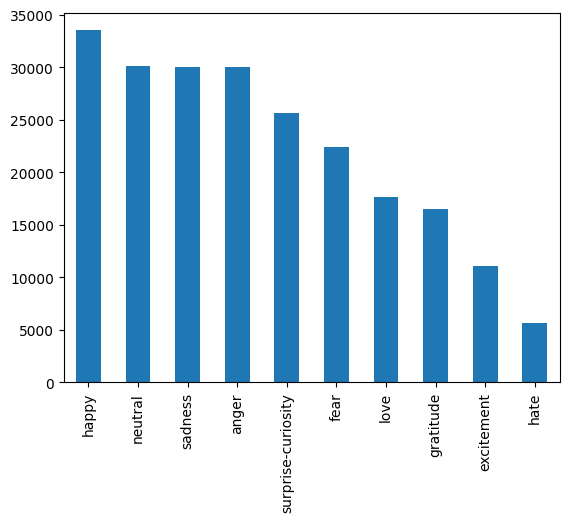

In [ ]:
sf_combined['Emotion'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Emotion', ylabel='count'>

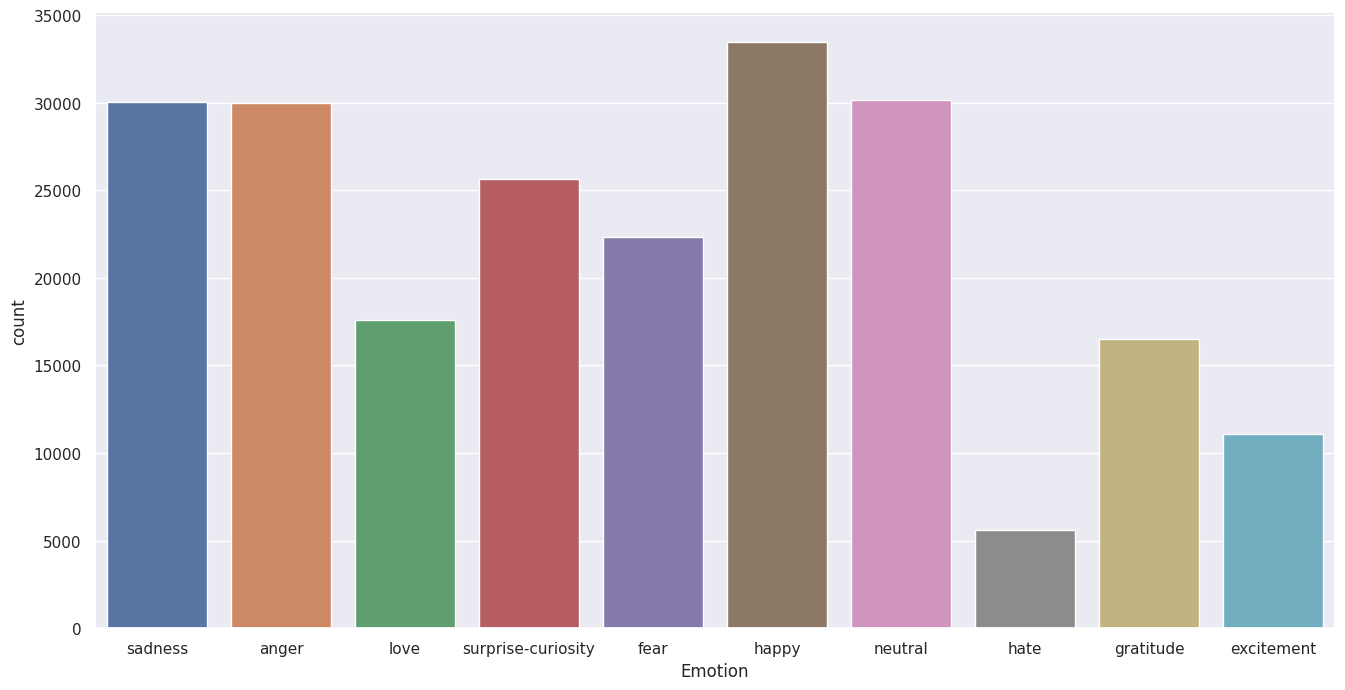

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})

sns.countplot(x = 'Emotion' , data = sf_combined)


In [ ]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
anger,29998
excitement,11069
fear,22357
gratitude,16517
happy,33489
hate,5605
love,17604
neutral,30142
sadness,30035


In [ ]:
sf_combined.loc[(sf_combined.Emotion == 'happy')].head(10)

,Text,Emotion
8,i have been with petronas for years i feel tha...,happy
11,i do feel that running is a divine experience ...,happy
14,i have immense sympathy with the general point...,happy
15,i do not feel reassured anxiety is on each side,happy
22,i have the feeling she was amused and delighted,happy
23,i was able to help chai lifeline with your sup...,happy
29,i feel more superior dead chicken or grieving ...,happy
30,i get giddy over feeling elegant in a perfectl...,happy
34,i can t imagine a real life scenario where i w...,happy
35,i am not sure what would make me feel content ...,happy


***END OF PREPROCESSING***

##**Model Training:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Transformers
from sklearn. feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# cols_to_scale = ['Emotion']

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# sf3['Emotion'] = le.fit_transform(sf3['Emotion'])
# sf3

In [ ]:
X=sf_combined['Text']
y=sf_combined['Emotion']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
print("Logistic Regression -")
print(f"Test score : {pipe_lr.score(x_test,y_test)}\nTrain score : {pipe_lr.score(x_train,y_train)}")

Logistic Regression -
Test score : 0.5041732224469918
Train score : 0.6134283787689048


In [ ]:
y_pred = pipe_lr.predict(x_test)
y_pred

array(['surprise-curiosity', 'neutral', 'love', ..., 'happy',
       'surprise-curiosity', 'neutral'], dtype=object)

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred,average='macro'))

0.45062453138428304

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5041732224469918

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred,average = 'macro'))

0.4887882463932275

 **Naive Bayes Algorithm:**



In [ ]:
pipe_nb = Pipeline(steps = [('cv',CountVectorizer()),('nb',MultinomialNB() )])

In [ ]:
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
print("Multinomial Naive Bayes -")
print(f"Test score : {pipe_nb.score(x_test,y_test)}\nTrain score : {pipe_nb.score(x_train,y_train)}")

Multinomial Naive Bayes -
Test score : 0.4608825953397767
Train score : 0.5772854252962142


In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipe_tree = Pipeline(steps=[('cv',CountVectorizer()),('dtree',DecisionTreeClassifier())])

In [ ]:
pipe_tree.fit(x_train,y_train)

In [ ]:
print("Decision Tree -")
print(f"Test score : {pipe_tree.score(x_test,y_test)}\nTrain score : {pipe_tree.score(x_train,y_train)}")

In [ ]:
cols_to_scale = ['Emotion']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sf_combined['Emotion'] = le.fit_transform(sf_combined['Emotion'])
sf_combined

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [ ]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

In [ ]:
lr = LogisticRegression()
mnb = MultinomialNB()
#knn =KNeighborsClassifier()
# svc = SVC()
# lsvc = LinearSVC(random_state=123)
dtree = DecisionTreeClassifier()

clifs = [lr, mnb, dtree]

# train and test them
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs:
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, x_train, x_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

In [ ]:
tweets =['@gargi is happy by winning lotteries #winnings','hey']
pipe_lr.predict(tweets)

In [ ]:
d ={'tweets' : ['@vansh i am so happy ','You are disgusting @rahul #mean','he love pancakes ','you are so annoying @badri'],
    'mentions' : ['@vansh','@rahul','','@badri'],
    'hashtags' : ['#happy','#mean','','']
   }

df_test = pd.DataFrame(d)
df_test

In [ ]:

df_test['Emotion'] = pipe_lr.predict(df_test['tweets'])
df_test

In [ ]:
df_combined.head()

In [ ]:
df_combined['Emotion'] = pipe_lr.predict(df_combined['tweets'])


In [ ]:
df_combined[250:260]

In [ ]:
import joblib
pipe_file = open("emotion_detection_1.pkl","wb")
joblib.dump(pipe_lr,pipe_file)
pipe_file.close()

In [ ]:
!pip install streamlit
!pip install streamlit-option-menu

In [ ]:
# core packages
import streamlit as st
import plotly.express as pex
from streamlit_option_menu import option_menu

# EDA packages
import pandas as pd
import numpy as np
import altair as alt

# utils
import joblib

pipe_lr = joblib.load(open("emotion_detection_1.pkl","rb"))

def predict_emotions(doc):
    results = pipe_lr.predict([doc])

    return results

def get_prediction_proba(doc):
    results = pipe_lr.predict_proba([doc])
    return results

emotion_dict = {"happy": "😄" , "sadness" : "😢", "love" : "😍", "anger" : "😠", "fear" : "😨😱","surprise-curiosity" : "😮🤔", "neutral" : "😐", "hate" : "😡","gratitude" : "🤗" }
def main():
    st.title("Emotion Detection App")

    menu = ["Home","Search by Emotion",'Search by Hashtags','Search by Mentions',"About"]
    with st.sidebar:

        choice = option_menu("Main Menu", menu,
        icons=['house', 'emoji-sunglasses','hash','at','info-circle'], menu_icon="cast", default_index=1)



    if choice == "Home":
        st.subheader("Home-Emotion In Text")

        with st.form(key="Emotion_clf_form"):
            raw_text = st.text_area("Type Here")
            submit_text = st.form_submit_button(label = "Submit")

        if submit_text:
            col1,col2 = st.columns(2)

            prediction = predict_emotions(raw_text)
            probability = get_prediction_proba(raw_text)
            with col1:
                st.success("Orignal Text")
                st.write(raw_text)

                st.success("Prediction")
                st.write(f"{prediction[0]} : {emotion_dict[prediction[0]]}")
                st.write(f"Confidence : {round(np.max(probability),2)}")


            with col2:
                st.success("Prediction probability")
                proba_df = pd.DataFrame(probability,columns= pipe_lr.classes_)
                proba_df_clean = proba_df.T.reset_index()
                proba_df_clean.columns = ['emotions','probability']

                fig = pex.bar(proba_df_clean,x = 'emotions', y = 'probability',color='emotions')
                st.plotly_chart(fig,use_container_width=True)
    elif choice == "Monitor":
        st.subheader("Monitor App")

    elif choice == "Search By Emotion":
        st.subheader("Search by a specific emotion")

    else:
        st.subheader("About")






if __name__ == '__main__':
    main()

In [ ]:
streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py

In [ ]:
import pandas as pd
BOOSTER_DICT = \
    {"absolutely": 1, "amazingly": 1, "awfully": 1,
     "completely": 1, "considerable": 1, "considerably": 1,
     "decidedly": 1, "deeply": 1, "effing": 1, "enormous": 1, "enormously": 1,
     "entirely": 1, "especially": 1, "exceptional": 1, "exceptionally": 1,
     "extreme": 1, "extremely": 1,
     "fabulously": 1, "flipping": 1, "flippin": 1, "frackin": 1, "fracking": 1,
     "fricking": 1, "frickin": 1, "frigging": 1, "friggin": 1, "fully": 1,
     "fuckin": 1, "fucking": 1, "fuggin": 1, "fugging": 1,
     "greatly": 1, "hella": 1, "highly": 1, "hugely": 1,
     "incredible": 1, "incredibly": 1, "intensely": 1,
     "major": 1, "majorly": 1, "more": 1, "most": 1, "particularly": 1,
     "purely": 1, "quite": 1, "really": 1, "remarkably": 1,
     "so": 1, "substantially": 1,
     "thoroughly": 1, "total": 1, "totally": 1, "tremendous": 1, "tremendously": 1,
     "uber": 1, "unbelievably": 1, "unusually": 1, "utter": 1, "utterly": 1,
     "very": 1,
     "almost": -1, "barely": -1, "hardly": -1, "just enough": -1,
     "kind of": -1, "kinda": -1, "kindof": -1, "kind-of": -1,
     "less": -1, "little": -1, "marginal": -1, "marginally": -1,
     "occasional": -1, "occasionally": -1, "partly": -1,
     "scarce": -1, "scarcely": -1, "slight": -1, "slightly": -1, "somewhat": -1,
     "sort of": -1, "sorta": -1, "sortof": -1, "sort-of": -1}

In [ ]:
def sentiment(input_words):
    score = 0
    n_val = -1
    p_val = 1
    p_lst = []
    n_lst = []
    input_words = input_words.lower()
    pw = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/positive.csv")
    nw = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/Anamika/data/negative.csv")

    all_pw = set(pw.to_string(index=False).split())
    all_nw = set(nw.to_string(index=False).split())

    for n in all_nw:
      n_lst.append(n.lower())
    for word in all_pw:
      if word in input_words:
        score+=p_val

    for word in n_lst:
      if word in input_words:
        score+=n_val

    for word in BOOSTER_DICT:
      if word in input_words:
        score+=BOOSTER_DICT[word]
    if score>0:
      return "Positive",score
    if score<0:
      return "Negative",score
    return "Neutral",score

sentiment("This is not happy")

In [ ]:
sentiment("This is a happy place")